# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [53]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [54]:
from sklearn.linear_model import Perceptron

clf = Perceptron(shuffle=False, verbose=0, eta0=.1, max_iter=10)
Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

[[-0.23  0.18]]
[-0.1]
0.875


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [56]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.
def runPerceptron(datasetName):
  print("Running perceptron on " + datasetName)
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=10)
  Data_Set = arff.loadarff(datasetName)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))
  print("\n\n")

runPerceptron("evaluation-dataset.arff")

Running perceptron on evaluation-dataset.arff
-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348,

**This one felt pretty straightforward. I just made a function to contain the running of the perceptron. I may come back and change it so that you need to pass hyperparameter values into the function. This would make it more robust.**

**I was surprised at how quickly it converged with such a large data set, especially when compared to the debug example which took 11 epochs**

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [57]:
from scipy.io import arff

# Load the ARFF files
goodData, goodDataMeta = arff.loadarff("goodData.arff")
badData, badDataMeta = arff.loadarff("badData.arff")

# Good Data
gdf = pd.DataFrame(goodData)
print("Good data\n", gdf, "\n\n")

# Bad Data
bdf = pd.DataFrame(badData)
print("Bad data\n", bdf, "\n\n")


Good data
      a1    a2 class
0  10.0  10.0  b'1'
1  10.1  10.1  b'1'
2 -10.1 -10.1  b'0'
3 -10.0 -10.0  b'0' 


Bad data
      a1    a2 class
0  10.0  10.0  b'0'
1  10.0  10.0  b'1'
2 -10.0 -10.0  b'0'
3 -10.0 -10.0  b'1' 




### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [58]:
# Train and print results with both datasets

runPerceptron("goodData.arff")
runPerceptron("badData.arff")

Running perceptron on goodData.arff
-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 4, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 8, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 12, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 16, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 20, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 2, Bias: 0.100000, T: 24, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
[[1. 1.]]
[0.1]
1.0



Running perceptron on badData.arff
-- Epoch 1
Norm: 0.00, NNZs: 0, Bias: 0.000000, T: 4, Avg. loss: 10.050000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 0, Bias: 0.000000, T: 8, Avg. loss: 10.050000
Total training tim


**I was surprised to see that the non-linearly seperable dataset still converged, though there were no changes made to the weights. I confused as to why the probability is 50%, rather than 100% or 0%. I think it must be because the initial setting is 50% certainty and it never changed.**

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

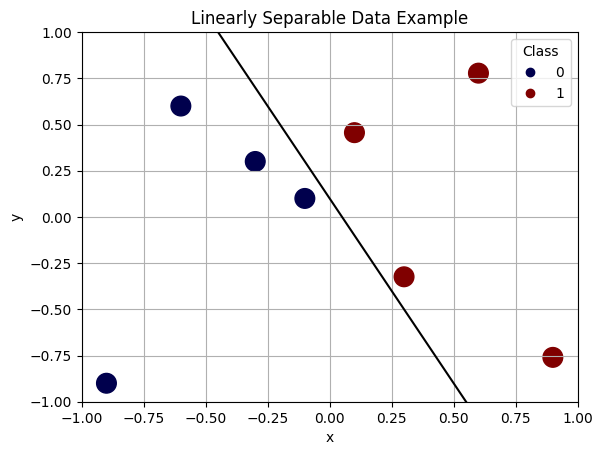

In [59]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

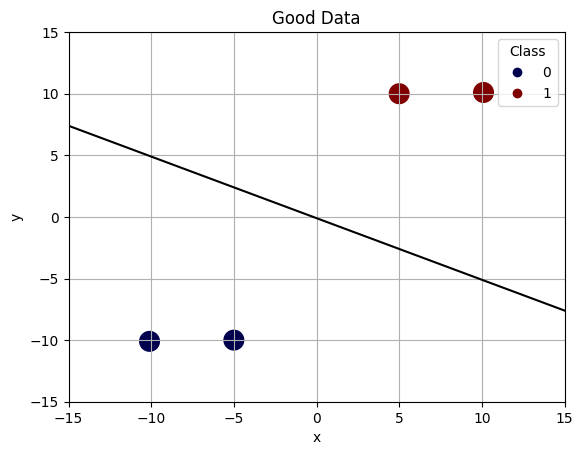

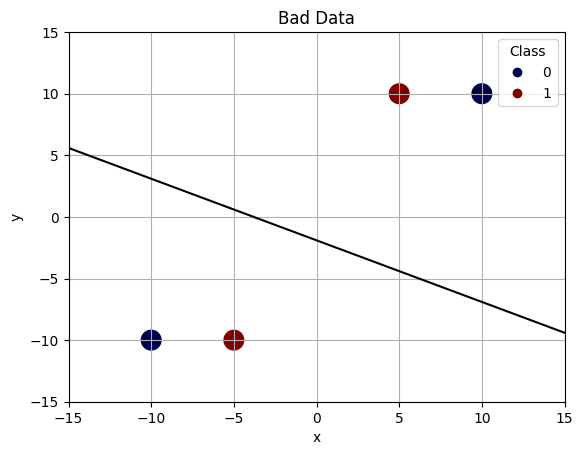

In [60]:
# Graph datasets and decision lines for both cases.
import matplotlib.pyplot as plt

## GOOD DATA
data = np.array([[5,10],[10.1,10.1],[-10.1, -10.1],[-5, -10]])
labels = np.array([1,1,0,0])

# Create a scatter plot of data
plt.xlim(-15,15)
plt.ylim(-15,15)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

xlist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -15 and 15 for the x axis
ylist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -15 and 15 for the y axis
slope = -.5
intercept = -0.1
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Good Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot



## BAD DATA
data = np.array([[5,10],[10,10],[-5, -10],[-10, -10]])
labels = np.array([1,0,1,0])

# Create a scatter plot of data
plt.xlim(-15,15)
plt.ylim(-15,15)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

xlist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -15 and 15 for the x axis
ylist = np.linspace(-15.0, 15.0, 100) # create 100 evenly spaced points between -15 and 15 for the y axis
slope = -.5
intercept = -1.9
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Bad Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

**I was surprised that the line of linear seperability also approximated the line of best fit. I suppose that's just because of the dataset that I've chosen and that other data sets would not follow this same occurance, but it was interesting that when I changed my values, the line shifted to be more exactly in the middle of them**

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

**I'm not sure if I understand this question. It can be interpreted in two ways. I'll discuss them both:**

**Option 1: Why perceptrons will not give correct outputs if the data given to them is not linearly seperable:**
My thoughts are they would learn incorrectly, and those incorrect things they learn would sway the weights that they output. Because the weights keep getting influenced incorrectly with each iteration, they keep getting a little bit off, despite getting some amount back on each time.


**Option 2: Why the line of seperability for non-linearly seperable data provided by the perceptron is not correct:**
The line of seperability would not look correct because the weights output are not correct. Whatever the cause of the data being non-linearly seperable, those outliers or odd data points sway the output of the perceptron and give inaccurates weights and therefore inaccurate line of seperability

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [61]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

numEpochs = []
trainAccuracies = []
testAccuracies = []

voting_data = arff.loadarff('votingDataSet.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_np_data_from_scipy = voting_df.to_numpy()

# Convert characters to numbers
def convert_features_and_labels(data):
    # Convert features (b'y' -> 1, b'n' -> 0)
    X = np.array([[1 if value == b'y' else 0 for value in row[:-1]] for row in data])

    # Convert labels (b'democrat' -> 0, b'republican' -> 1)
    y = np.array([0 if label == b'democrat' else 1 for label in data[:, -1]])

    return X, y

X, y = convert_features_and_labels(voting_np_data_from_scipy)

def runSplitPerceptron(datasetName, randomState):
    clf = Perceptron(shuffle=False, verbose=0, eta0=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randomState)
    clf.fit(X_train, y_train)
    numEpochs.append(clf.n_iter_)

    #Train accuracy
    trainAccuracy = clf.score(X_train, y_train)
    trainAccuracies.append(trainAccuracy)

    # Test accuracy
    testAccuracy = clf.score(X_test, y_test)
    testAccuracies.append(testAccuracy)


# Run the perceptron 5 times with different random splits
for i in range(0, 5):
    runSplitPerceptron("votingDataSet.arff", i)


averages = [np.mean(numEpochs), np.mean(trainAccuracies), np.mean(testAccuracies)]
trainAccuracies.append(averages[1])
testAccuracies.append(averages[2])
numEpochs.append(averages[0])

# Create a DataFrame
data = {'Trial': [1,2,3,4,5, "Average"],
        'Training Accuracy': trainAccuracies,
        'Test Accuracy': testAccuracies,
        'Number of Epochs': numEpochs,}

df = pd.DataFrame(data)
print(df.to_string(index=False))



  Trial  Training Accuracy  Test Accuracy  Number of Epochs
      1           0.972050       0.956835              17.0
      2           0.913043       0.906475              11.0
      3           0.965839       0.949640              20.0
      4           0.968944       0.964029              12.0
      5           0.962733       0.964029              14.0
Average           0.956522       0.948201              14.8


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [62]:
#Learn once on the full voting data set.  If you Look at our tutorial at the beginning

clf = Perceptron(shuffle=False, verbose=0, eta0=1)
X, y = convert_features_and_labels(voting_np_data_from_scipy)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

[[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
[-9.]
0.9674620390455532





**Inputs 13 and 14 are 0. Additionally, I noticed that input 4 is MUCH higher than all the other inputs.**

**This suggests that inputs 13 and 14 have been completely ignored and are irrevlevant to the outcome, while inputs 4 has a lot of influence on the outcome, almost double the next highest influencer**

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 50% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

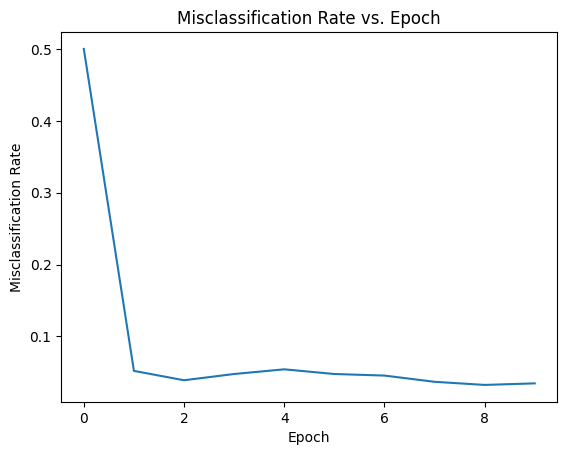

In [63]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

misclassificationData = [.5]


def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()


def calcPerceptronMisclassificationRate(randomState):
  perceptron = Perceptron(shuffle=False, verbose=0, eta0=1, random_state=randomState)
  X, y = convert_features_and_labels(voting_np_data_from_scipy)
  numIterTillConvergence = perceptron.fit(X, y).n_iter_

  perceptron = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=True, max_iter=1, random_state=randomState)
  converged = False
  iterations = 0
  while not converged:

    perceptron.fit(X, y)
    misclassificationData.append(1 - perceptron.score(X, y))

    if iterations == numIterTillConvergence:
        converged = True
    else:
        iterations += 1

calcPerceptronMisclassificationRate(123)
plot_misclassification(misclassificationData)

**I was surprised to see the bump up in inacurracy at epoch 4. I don't know why this would be. My theory is that the data contains noise, and that noise takes a second to understand and ignore. I was also surprised to see that the point of convergence was not the lowest point on the graph. it was actually the epoch BEFORE convergence that was the most accurate. But the good news is it's all so low, it's probably fine anyway**

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [64]:
# Run the model with different hyperparameters

X, y = convert_features_and_labels(voting_np_data_from_scipy)

print("Everything Nominal!")
clf = Perceptron(shuffle=False, verbose=0, eta0=1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Shuffle on!")
clf = Perceptron(shuffle=True, verbose=0, eta0=1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Large learning rate!")
clf = Perceptron(shuffle=False, verbose=0, eta0=50)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Tiny learning rate!")
clf = Perceptron(shuffle=False, verbose=0, eta0=.00001)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Verbose on!")
clf = Perceptron(shuffle=False, verbose=1, eta0=1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("No bias weight!")
clf = Perceptron(shuffle=False, verbose=0, eta0=1, fit_intercept=False)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Random state 1!")
clf = Perceptron(shuffle=False, verbose=0, eta0=1, random_state=1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Random state 2!")
clf = Perceptron(shuffle=False, verbose=0, eta0=1, random_state=2)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

print("Warm start on!")
clf = Perceptron(shuffle=False, verbose=0, eta0=1, warm_start=True)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))
print("\n\n")

Everything Nominal!
[[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
[-9.]
0.9674620390455532



Shuffle on!
[[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
[-9.]
0.9609544468546638



Large learning rate!
[[ 100. -150. -350.  950.  150. -100.   50.  250. -450.  100. -450.   50.
     0.    0. -150.  300.]]
[-450.]
0.9674620390455532



Tiny learning rate!
[[ 1.00000000e-05 -1.00000000e-05 -6.00000000e-05  1.50000000e-04
   2.00000000e-05 -1.00000000e-05  3.38813179e-21  4.00000000e-05
  -6.00000000e-05  2.00000000e-05 -7.00000000e-05  2.00000000e-05
  -3.38813179e-21  3.38813179e-21 -3.00000000e-05  5.00000000e-05]]
[-8.e-05]
0.9609544468546638



Verbose on!
-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.0000

**Intersting experiments! I was surprised to see that the nominal test, and both random_state tests resulted in the exact same numbers.**

**Another intersting thing is that changing the learning rate seemed to just change the scale of the weights. The large numbered learning rate put out massive weights, and the small learning rate put out tiny weights. I suspect this is because there are many local minimums on the way to the global minimum, and both of those fell into those. This is good and bad, because while their accuracy was good, it may not have been optimal, or taken an optimal amount of time.**

**Shuffling and no having a bias weight didn't seem to affect things too much, but it's also hard to see effect just from raw data**

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [84]:
from scipy.io import arff
import pandas as pd
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.preprocessing import MinMaxScaler


wine_data = arff.loadarff('wine_dataset.arff')
wine_df = pd.DataFrame(wine_data[0])

scaler = MinMaxScaler()
numeric_cols = wine_df.columns[:-1]
wine_df[numeric_cols] = scaler.fit_transform(wine_df[numeric_cols])

wine_df['class'] = wine_df['class'].apply(lambda x: x.decode('utf-8'))

wine_np_data_from_scipy = wine_df.to_numpy()

X, y = wine_np_data_from_scipy[:, :-1], wine_np_data_from_scipy[:, -1]


clf = Perceptron(shuffle=False, verbose=1, eta0=.01)
clf.fit(X, y)

print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Accuracy Score:", clf.score(X, y))


-- Epoch 1
Norm: 0.02, NNZs: 13, Bias: -0.020000, T: 178, Avg. loss: 0.000194
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 13, Bias: -0.020000, T: 356, Avg. loss: 0.000314
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 13, Bias: -0.030000, T: 534, Avg. loss: 0.000115
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 13, Bias: -0.030000, T: 712, Avg. loss: 0.000314
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 13, Bias: -0.030000, T: 890, Avg. loss: 0.000103
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 13, Bias: -0.030000, T: 1068, Avg. loss: 0.000068
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 0.02, NNZs: 13, Bias: 0.000000, T: 178, Avg. loss: 0.000436
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 13, Bias: 0.000000, T: 356, Avg. loss: 0.000012
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 13, Bias: 0.000000, T: 

**This data seemed to do okay! At first I got a really low accuracy score, but then I realized I had my learning rate set to 10. So instead I lowered it down to .1. I also tried lowering it past .1 to .01, but that didn't increase the accuracy in any meaningful way so I moved it back to .1**

**That being said, the accuracy score is still lower than I'd like it to be. I suspect that this is because of the complexity of the dataset. This dataset has 3 outputs, and because of that it had to run fit 3 times. I suspect that the errors in each may have compounded because of this.**

**It seems as though the middle bias was completely ignored, and I'm not sure what to make of that. It might be that I'm looking at the wrong iteration, but I'm not sure**

## 5. (Optional 15% extra credit) Code up your own perceptron learner

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [ ]:
# Your Perceptron Code

*Discussion*

In [ ]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass